#### INFO7390 Adv Data Sci  
## **Mini Project 1 - Interpretability**  
    
Name: Fangqing Wu  
NUID: 001305642

---
**License**  
This project is licensed under [MIT License](https://raw.githubusercontent.com/fwqfwq/dataset/master/MIT%20License)
\
\
**Links**  
Google Colab: https://colab.research.google.com/drive/1SBJXeX7bdaQr9AGEAFefixifFmQ0ClkG?usp=sharing   

Dataset: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction  








---
### **Abstract**  
Interpretability plays an increasingly significant role in machine learning, in respect of the deep impact on significatant decisions, and even human lives. Unlike inherently interpretable models, Black Box Model is way more harder to be interpreted step by step and becomes a necessity for the built model to go into production.  
\
In this project the methods for interpretability would be applied into different models, comparing the different performance on regression models and black box models. The ELI5 would be used for XGBoost and RandomForests. 

---


### **Interpretability**
Two parts are included as below:  
* conception 
* implementation on dataset  



####**Conception: Why interpretability?**

Machine Learning is no longer an unfamiliar word for these years. It has became a key enabling technology in science and real life, even the scenarios of significant-decision making.  

But here is the question, how could decision maker trust the model and the outputs? 

The common way is to score, as an efficient evalutional metrics for models, for the accuracy or the possibilities. This is actually the way targeted at the model and the algorithms.   
\
**• Bias & Fairness**  
Bias exists inside the human brain and is reflected into the whole society. There are three aspects[1] that would lead to the bias: 
1. Data adequacy  
Sometimes records are removed if they contain missing values and these may be more prevalent in some groups than others.
2. Model adequacy   
The model architecture may describe some groups better than others.  
3. Data bias  
The existing prejudices. 


**• Explainability & Interpretability**  
They're two similar words describing the possibility for human's comprehension, but involving with separately meanings with slightly differences.   
For explainability, it focuses on the internal mechanics, able to quite literally explain what is happening.   
For interpretability, it focuses on the cause and effect that can be observed within a system, like the variable control and its prediction. 




#### **Dataset Introduction** 

The main data repository consistes of:  
>| Featrue | Description | | Featrue | Description | | Featrue | Description |
| ----------- | ----------- | | ----------- | ----------- | | ----------- | ----------- |
| 'id' | Unique ID for the customer | | 'Gender' | Gender of the customer | | 'Age' | Age of the customer |
| 'Driving_License' | 0: no DL, 1: has DL | | 'Region_Code' | Unique code for the region of the customer | | 'Previously_Insured' | 0: no insurance, 1: has insurance  |
| 'Vehicle_Age' | Age of the Vehicle | | 'Vehicle_Damage' | 0: no damage history, 1: has damage history | | 'Annual_Premium' | The amount customer needs to pay as premium in the year |
| 'Response' | 0: not interested, 1: interested || 'Vintage' | Number of Days, Customer has been associated with the company |  | 'Policy_Sales_Channel' | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. | 


The dataset is with 12 features; and the target is to train the pattern for each '*id*' and predict the '*Response*'.   

   
#### **Dataset Preprocessing** 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import random
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/fwqfwq/dataset/master/healthinsurance/train.csv'
dataset = pd.read_csv(url)
print(dataset.columns.values)

['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage' 'Response']


First, a direct perception for dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


As seen, no null valus exist in this dataset. 

In [ ]:
dataset.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
dataset.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


For a better use for training, turn the string-valued features into numeric values, including:   
* '*Gender*' 
* '*Vehicle_Age*'
* '*Vehicle_Damage*'   


In [ ]:
dataset['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

'*Gender*' is valued with 'Male' or 'Female';  
'*Vehicle_Age*' has three unique values(as above);  
'*Vehicle_Damage*' is vauled with 'Yes' or 'No. 

In [ ]:
gender = {'Male': 1, 'Female': 2} 
ve_age = {'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3} 
ve_damage = {'Yes': 1, 'No': 0} 

In [ ]:
dataset['Gender'] = [gender[item] for item in dataset['Gender']] 
dataset['Vehicle_Age'] = [ve_age[item] for item in dataset['Vehicle_Age']] 
dataset['Vehicle_Damage'] = [ve_damage[item] for item in dataset['Vehicle_Damage']] 
dataset.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,2,29,1,41.0,1,1,0,27496.0,152.0,39,0
5,6,2,24,1,33.0,0,1,1,2630.0,160.0,176,0
6,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0
7,8,2,56,1,28.0,0,2,1,32031.0,26.0,72,1
8,9,2,24,1,3.0,1,1,0,27619.0,152.0,28,0
9,10,2,32,1,6.0,1,1,0,28771.0,152.0,80,0


Data fixed. 

#### **Data Visualization**  



1. Histograms for the sight of data distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72833c91d0>,
      dtype=object)

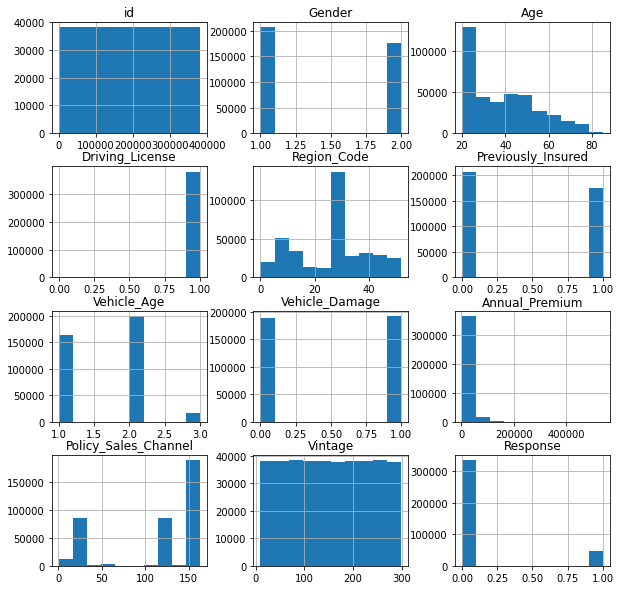

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dataset.hist(ax = ax)

As features represent: 

* several features are binary or only have three values
* '*id*', '*Region_Code*' and 'Policy_Sales_Channel*' are string_valued 


2. Heatmap for correlations.

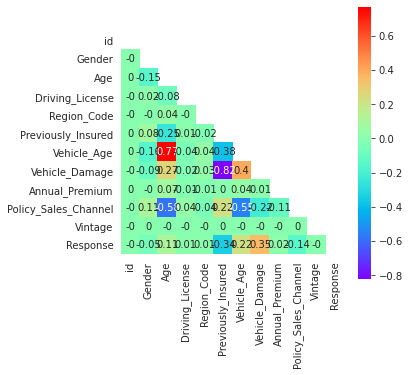

In [ ]:
plt.figure(figsize=(5,5))

mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(dataset.corr().round(2), mask=mask,
                     annot=True, cmap='rainbow', square=True)

As seen, '*Response*' is mostly related with '*Previous_Insured*'(negetive) and '*Vehicle_Damage*'(positive).   

\

2. Detailed distribution diagrams for specific features  

'*Age*'

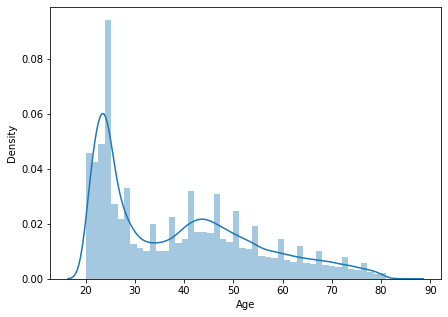

In [ ]:
plt.figure(figsize=(7,5))
age = dataset['Age']
sns.distplot(age)

'*Annual_Premium*'

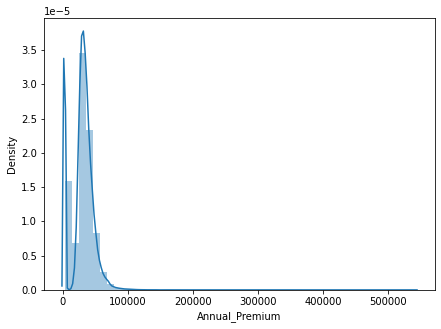

In [ ]:
plt.figure(figsize=(7,5))
ap = dataset['Annual_Premium']
sns.distplot(ap)

{'boxes': [<matplotlib.lines.Line2D at 0x7f727f3fc0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f727f3fcac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f727f386588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f727f386208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f727f3fc3c8>,
  <matplotlib.lines.Line2D at 0x7f727f3fc748>]}

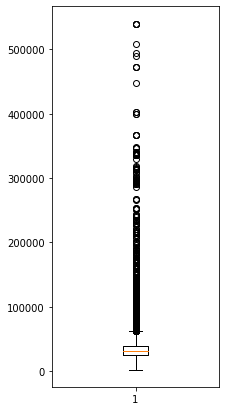

In [ ]:
fig, ax = plt.subplots(figsize=(3, 7))
ax.boxplot(dataset['Annual_Premium'])

Remove the outliers. 

In [ ]:
# Values above the 99.9th percentile were dropped
percentile_ap = dataset['Annual_Premium'].quantile(0.999)
dataset = dataset[-(dataset['Annual_Premium'] > percentile_ap)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f727f354eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f727f361908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f727f36d3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f727f36d048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f727f361208>,
  <matplotlib.lines.Line2D at 0x7f727f361588>]}

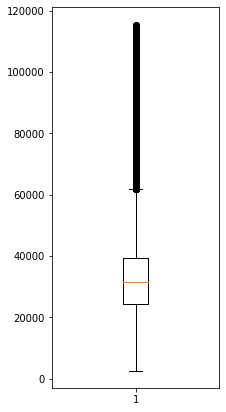

In [ ]:
fig, ax = plt.subplots(figsize=(3, 7))
ax.boxplot(dataset['Annual_Premium'])

\

'*Vintage*'

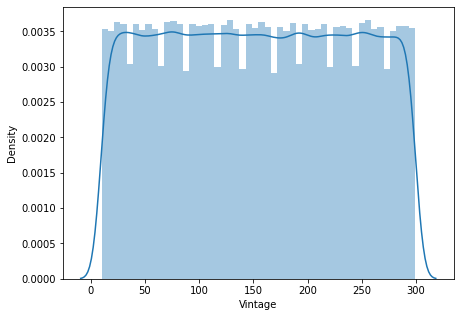

In [ ]:
plt.figure(figsize=(7,5))
vintage = dataset['Vintage']
sns.distplot(vintage)

3. Violin diagrams 

(1)

Text(0, 0.5, 'Age')

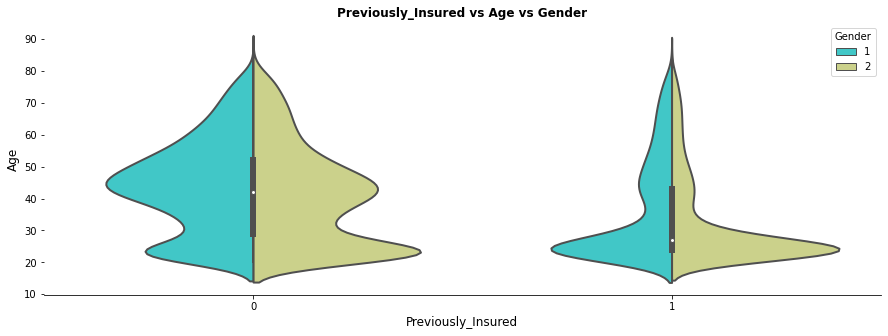

In [ ]:
plt.figure(figsize=(15,5))

sns.violinplot(x='Previously_Insured', y ='Age', hue='Gender', data=dataset, palette='rainbow', bw=.2,
               cut=2, linewidth=2, iner='box', split=True)
sns.despine(left=True)
plt.title('Previously_Insured vs Age vs Gender', weight='bold')
plt.xlabel('Previously_Insured', fontsize=12)
plt.ylabel('Age', fontsize=12)

For those not previously insured, there are more male in 40s and more female in 20s, while for those previouly insured, mostly are 20s for both gender.  

\

(2)

Text(0, 0.5, 'Annual_Premium')

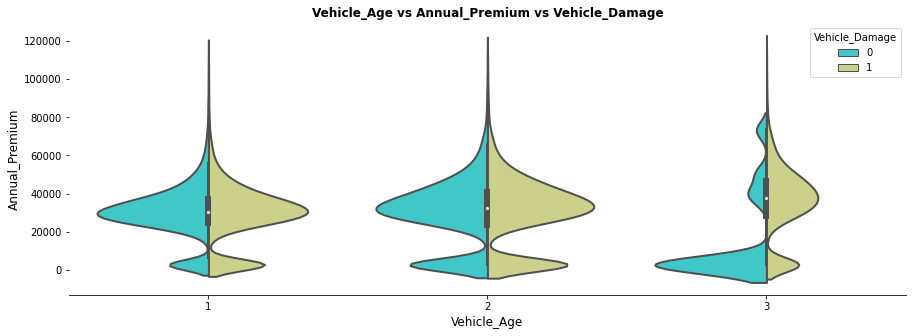

In [ ]:
plt.figure(figsize=(15,5))

sns.violinplot(x='Vehicle_Age', y ='Annual_Premium', hue='Vehicle_Damage', data=dataset, palette='rainbow', bw=.2,
               cut=2, linewidth=2, iner='box', split=True)
sns.despine(left=True)
plt.title('Vehicle_Age vs Annual_Premium vs Vehicle_Damage', weight='bold')
plt.xlabel('Vehicle_Age', fontsize=12)
plt.ylabel('Annual_Premium', fontsize=12)

For those who own their vehicle less than 1 year(x=1) and 1-2 years(x=2), the distributions for ananual premium fee share the same pattern. To those are more than 3 years and have no damage, the less fee would be paid.   




#### **Data Training & Prediction**  


First, split the train and test data.





In [ ]:
target = dataset.iloc[:,-1:]
data = dataset.iloc[:, :-1]

X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=1)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", Y_train.shape)
print("Y test shape: ", Y_test.shape)

X train shape:  (285546, 11)
X test shape:  (95182, 11)
Y train shape:  (285546, 1)
Y test shape:  (95182, 1)


In [ ]:
print(data.columns.values)
print(target.columns.values)

['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage']
['Response']


Import modules and install lime. 

In [ ]:
!pip install shap
!pip install lime
!pip install eli5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics.scorer import make_scorer

import lime
import lime.lime_tabular

import eli5
from eli5.sklearn import PermutationImportance

Training XGBoost model.   
 
The default xgboost uses 'gbtree' booster, which is suitable for the dataset.   
gamma: minimum loss reduction required to make a further partition on a leaf node of the tree, a complexity control.
The higher Gamma is, the higher the regularization. Default value is 0 (no regularization).   

\
Find the best gamma. 

In [ ]:
scores_xgb = []

for i in range(20): 
  xgb = XGBClassifier(gamma=i)
  xgb.fit(X_train, Y_train) 
  scores_xgb.append(xgb.score(X_test, Y_test))

Text(0, 0.5, 'Score')

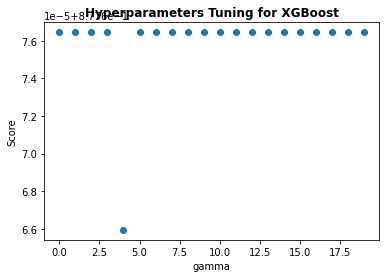

In [ ]:
plt.scatter(range(20), scores_xgb)
plt.title('Hyperparameters Tuning for XGBoost', weight='bold')
plt.xlabel('gamma')
plt.ylabel('Score')

In [ ]:
xgbm = XGBClassifier(scores_xgb.index(max(scores_xgb)))
xgbm.fit(X_train, Y_train)

xgbm.score(X_test, Y_test)

0.8776764514298923

Get the report and the scores (R2, mse, roc&auc). 

In [ ]:
xgb_predict = xgbm.predict(X_test)
print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83539
           1       0.00      0.00      0.00     11643

    accuracy                           0.88     95182
   macro avg       0.44      0.50      0.47     95182
weighted avg       0.77      0.88      0.82     95182



In [ ]:
# R2 Score & Mean Squared Error
r2_xgb = r2_score(Y_test, xgb_predict)
print("r2 score: ", r2_xgb)

mse_xgb = mean_squared_error(Y_test, xgb_predict)
print("mse score: ", mse_xgb)

r2 score:  -0.13937202983037866
mse score:  0.1223235485701078


ROC AUC Score:  0.5


Text(0, 0.5, 'True Positive Rates')

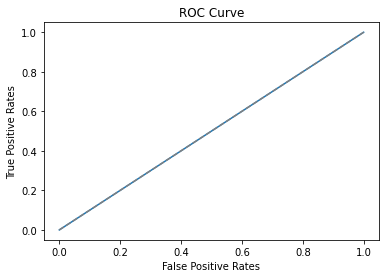

In [ ]:
xgb_probility = xgbm.predict_proba(X_test)

# Slice out the probaility
xgb_score = roc_auc_score(Y_test, xgb_probility[:, 1])
print('ROC AUC Score: ', xgb_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, xgb_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

Due to the features, this model is actually overfitted. 

Interpretability

To interpret the model, the importance of featureas and the effect of each feature should be displayed.  
'Feature Weights': based on the number of times a feature appears in a tree across the ensemble of trees  
'Coverage': the average coverage (number of samples affected) of splits which use the feature  
'Gain': the average gain of splits which use the feature

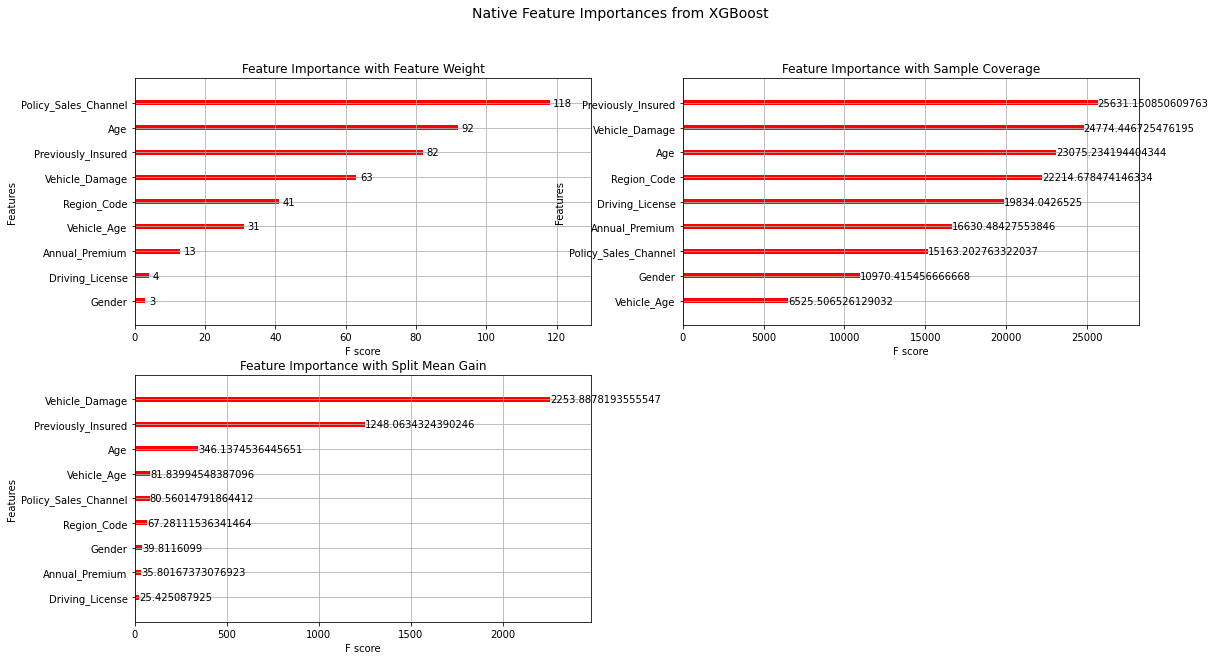

In [ ]:
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Native Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Feature Importance with Feature Weight");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Feature Importance with Sample Coverage");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Feature Importance with Split Mean Gain");

ELI5 Model Interpretation(Explain like I am 5) 

Basically, the get_booster() is similar with 'gain'

In [ ]:
eli5.show_weights(xgb.get_booster())
# eli5.show_weights(xgb, feature_names=data.columns.values)

Weight,Feature
0.5394,Vehicle_Damage
0.2987,Previously_Insured
0.0828,Age
0.0196,Vehicle_Age
0.0193,Policy_Sales_Channel
0.0161,Region_Code
0.0095,Gender
0.0086,Annual_Premium
0.0061,Driving_License
0,Vintage


Use the show_prediction(), inspect an individual prediction of a model, try to figure out why the model makes the decision it makes.

In [ ]:
i = 7 #the feature 'Vehicle_Damage'
eli5.show_prediction(xgb, X_test.iloc[i], feature_names=data.columns.values, show_feature_values=True)

XGBoost outputs scores only for leaves, so the XGBoost explainer implementation in ELI5 starts reconstructing pseudo leaves scores for every node across all the trees.   
This algorithm also applies to the root nodes of the trees, where the score is the average score that may get going through all the trees. This is what ELI5 puts into \<BIAS\>.   



\

Random Forests 

Test for the estimators. 

In [ ]:
scores_rf = []
# Try different estimators
for i in range(50):
  rf = RandomForestClassifier(max_depth=3, n_estimators=i+1)
  rf.fit(X_train, Y_train)

  score = rf.score(X_test, Y_test)
  scores_rf.append(score)

Text(0, 0.5, 'Score')

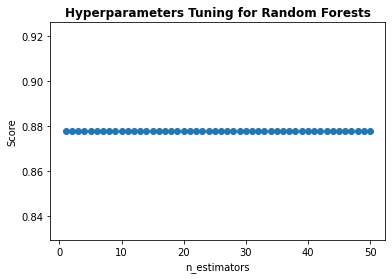

In [ ]:
plt.scatter(range(1,51), scores_rf)
plt.title('Hyperparameters Tuning for Random Forests', weight='bold')
plt.xlabel('n_estimators')
plt.ylabel('Score')

Prediction Reports and Scores

In [ ]:
rf_predict = rf.predict(X_test)

print(classification_report(Y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83539
           1       0.00      0.00      0.00     11643

    accuracy                           0.88     95182
   macro avg       0.44      0.50      0.47     95182
weighted avg       0.77      0.88      0.82     95182



In [ ]:
# R2 Score & Mean Squared Error
r2_rf = r2_score(Y_test, rf_predict)
print("r2 score: ", r2_rf)

mse_rf = mean_squared_error(Y_test, rf_predict)
print("mse score: ", mse_rf)

r2 score:  -0.13937202983037866
mse score:  0.1223235485701078


ROC AUC Score:  0.8387645284737962


Text(0, 0.5, 'True Positive Rates')

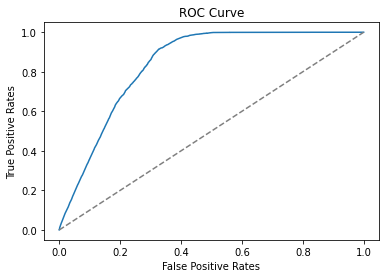

In [ ]:
rf_probility = rf.predict_proba(X_test)

# Slice out the probaility
rf_score = roc_auc_score(Y_test, rf_probility[:, 1])
print('ROC AUC Score: ', rf_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, rf_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

ELI5 Model Interpretation(Explain like I am 5) 

Basically, the get_booster() is similar with 'gain'

In [ ]:
eli5.show_weights(rf, feature_names=data.columns.values)

Weight,Feature
0.4257 ± 0.6732,Vehicle_Damage
0.3304 ± 0.6922,Previously_Insured
0.0965 ± 0.2844,Vehicle_Age
0.0939 ± 0.3363,Age
0.0420 ± 0.1548,Policy_Sales_Channel
0.0090 ± 0.0260,Region_Code
0.0015 ± 0.0077,Annual_Premium
0.0009 ± 0.0066,Gender
0.0001 ± 0.0004,id
0.0000 ± 0.0000,Vintage


Use the show_prediction(), inspect an individual prediction of a model, try to figure out why the model makes the decision it makes.

In [ ]:
i = 7 #the feature 'Vehicle_Damage'
eli5.show_prediction(rf, X_test.iloc[i], feature_names=data.columns.values, show_feature_values=True)

   
### **Conclusion**  

This dataset is not suitable for a XGBoost and Random Forests training and prediction. 

The most important feature for this is '*Vehicle_Damage*', then the '*Age*'. 



   
### **Reference** 

[1] Tutorial #1: bias and fairness in AI https://www.borealisai.com/en/blog/tutorial1-bias-and-fairness-ai/  
[2] Explainable AI: Interpreting, Explaining and Visualizing Deep Learning https://books.google.com/books?id=j5yuDwAAQBAJ&lpg=PR5&ots=Iq2QQB0S6I&dq=Explainable%20AI%3A%20Interpreting%2C%20Explaining%20and%20Visualizing%20Deep%20Learning%20reference&lr&pg=PR5#v=onepage&q=Explainable%20AI:%20Interpreting,%20Explaining%20and%20Visualizing%20Deep%20Learning%20reference&f=false  
[3] LIME https://medium.com/analytics-vidhya/model-interpretability-lime-part-2-53c0f5e76b6a  
[4] Xgboost \<BIAS\>  https://stackoverflow.com/questions/49402701/eli5-explaining-prediction-xgboost-model  
